# Read dicom

In [10]:
import dicom
import os
import numpy
import pylab

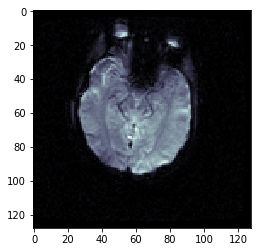

In [14]:
ds = dicom.read_file("data/000003.dcm")
pylab.imshow(ds.pixel_array, cmap = pylab.cm.bone)
pylab.show()

In [16]:
import sys
import dicom
import numpy as np
import pandas as pd

dm = dicom.read_file('data/000004.dcm')
print(dm.pixel_array)
sys.stdout.flush()

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.1706.4001.269230325771587167801742371365
(0008, 0020) Study Date                          DA: '19970608'
(0008, 0021) Series Date                         DA: '19970608'
(0008, 0022) Acquisition Date                    DA: '19970608'
(0008, 0023) Content Date                        DA: '19970608'
(0008, 0030) Study Time                          TM: '090647'
(0008, 0031) Series Time                         TM: '091150'
(0008, 0032) Acquisition Time                    TM: '091150'
(0008, 0033) Content Time                        TM: '091150'
(0008, 0050) Accession Number                    SH: '2819497684894126'
(0008, 0060) Modality                            CS: 'MR'
(0008, 0070) Manufacturer 

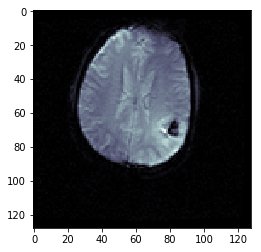

In [17]:
import dicom
import pylab
ds=dicom.read_file("data/000000.dcm")
print (ds)
pylab.imshow(ds.pixel_array, cmap=pylab.cm.bone)
pylab.show()

In [18]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom

RefDs = dicom.read_file('data/000000.dcm')

print(RefDs)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.1706.4001.269230325771587167801742371365
(0008, 0020) Study Date                          DA: '19970608'
(0008, 0021) Series Date                         DA: '19970608'
(0008, 0022) Acquisition Date                    DA: '19970608'
(0008, 0023) Content Date                        DA: '19970608'
(0008, 0030) Study Time                          TM: '090647'
(0008, 0031) Series Time                         TM: '091150'
(0008, 0032) Acquisition Time                    TM: '091150'
(0008, 0033) Content Time                        TM: '091150'
(0008, 0050) Accession Number                    SH: '2819497684894126'
(0008, 0060) Modality                            CS: 'MR'
(0008, 0070) Manufacturer 

In [19]:
from datetime import datetime

print('a) The image is '+str(RefDs.Rows)+'x'+str(RefDs.Columns)+' pixels')
print('b) The manufacturer is '+str(RefDs.Manufacturer))
print('c) The model is '+str(RefDs.ManufacturersModelName))
print('d) The image modality is '+str(RefDs.Modality))
d=datetime.strptime(RefDs.AcquisitionDate,'%Y%m%d')
print('e) The image was made on '+str(d.date()))
if RefDs.PatientsName=='':
    print('f) The patient\'s name is unkown')
else:
    print('f) The patient\'s name is '+str(RefDs.PatientsName))

print('g) The image was encoded with '+str(RefDs.BitsStored)+' bits ')

a) The image is 128x128 pixels
b) The manufacturer is GE MEDICAL SYSTEMS
c) The model is GENESIS_SIGNA
d) The image modality is MR
e) The image was made on 1997-06-08
f) The patient's name is  
g) The image was encoded with 16 bits 


[0, 127, 0, 127]

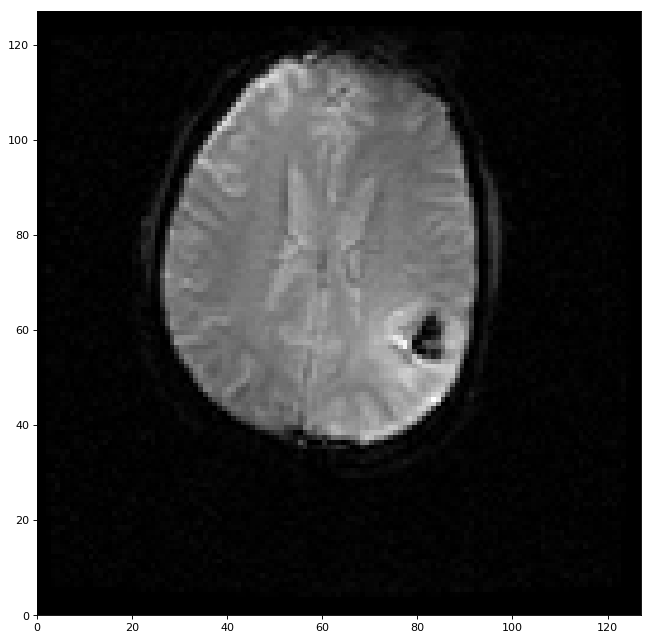

In [21]:
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns))
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ds = dicom.read_file('data/000000.dcm')
ArrayDicom[:,:]=ds.pixel_array

#plt.figure()
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale
x=np.arange(RefDs.Rows)
y=np.arange(RefDs.Columns)

plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :]))
plt.axis([x.min(),x.max(),y.min(),y.max()])
